## Columns Title and description:

* $\textbf{Car ID}$ :- Unique key given to each car by car Name.
* $\textbf{Symbolising}$ :- Car's risk level, often used in insurance calculations, and is typically represented as a numerical rating.
* $\textbf{CarName}$ :- The name of the car that's for sale.
* $\textbf{fueltype}$ :- Describes the type of energy source it uses (gas, diesel).
* $\textbf{Aspiration}$ :- Type of air induction system used in the car's engine (Standard an Turbo).
* $\textbf{Doornumber}$ :- Number of total doors on the car.
* $\textbf{Carbody}$ :- Describes the car's body in listed categories.
* $\textbf{drivewheel}$ :- It specifies which wheels receive engine power to propel the car.
* $\textbf{enginelocation}$ :- Describes where the engine is present within the car.
* $\textbf{wheelbase}$ :- The distance between the front and rear axles of the car, affecting stability, handling, and interior space.
* $\textbf{carlength, carwidth, carheight}$ :- Physical dimensions of the car (inches).
* $\textbf{curbweight}$ :- The total weight of the car with all standard equipment and fluids, but without passengers or cargo (lbs).
* $\textbf{enginetype}$ :- This describes the design or configuration of the engine's internal components.
* $\textbf{cylindernumber}$ :- No. of cylinders that car has.
* $\textbf{enginesize}$ :- the total displacement volume of all the engine’s cylinders, measured cc.
* $\textbf{fuelsystem}$ :- This column specifies the mechanism used to deliver fuel to the engine.
* $\textbf{boreratio}$ :- The diameter of the engine’s cylinders (in inches).

* $\textbf{stroke}$ :- The distance the piston travels inside the cylinder (in inches).

* $\textbf{compressionratio}$ :- The ratio of the cylinder’s maximum to minimum volume during the engine cycle, indicating engine efficiency.

* $\textbf{horsepower}$ :- Power of the car's engine.

* $\textbf{peakrpm}$ :- It's the engine speed (in revolutions per minute) at which the engine produces its maximum power.

* $\textbf{citympg}$ :- It's the estimated (in miles per gallon) the car achieves in city driving conditions.

* $\textbf{highwaympg}$ :- It tells the estimated (miles per gallon) the car achieves on highways.

* $\textbf{price}$ :- is the manufacturer’s suggested retail price (MSRP) of the car, usually in U.S. dollars.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Data Exploration and preprocessing

In [4]:
df = pd.read_csv(r'/content/CarPrice_Assignment.csv')
df = df.drop(columns = ['car_ID','CarName'])

In [5]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### There are 9 categorical features and 17 numerical features overall.

In [9]:
print(df.isna().sum())

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [10]:
print(df.duplicated().sum())

1


### There are no duplicates and null values.

## Let's do univariate analysis

In [41]:
df_numerical = df.select_dtypes(include = ['int64','float64'])

In [42]:
df_numerical.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
df_category = df.select_dtypes(exclude = ['int64','float64'])

In [44]:
df_category.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Name all the columns here.


In [45]:
import math

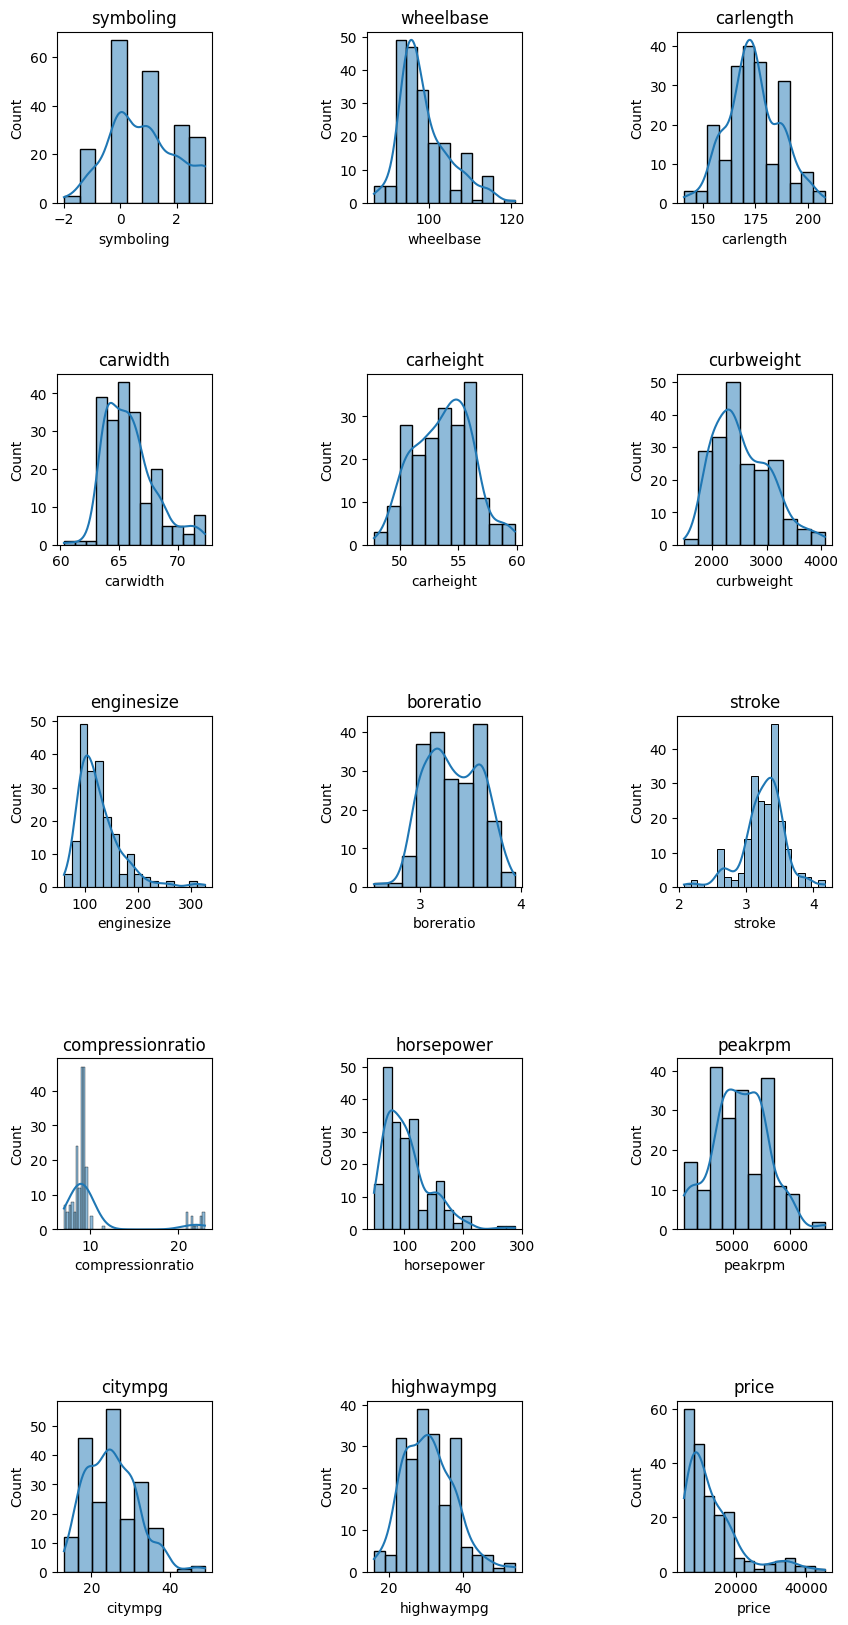

In [46]:
cols = 3
num_plots = len(df_numerical.columns)
rows = math.ceil(num_plots/cols)

fig,axes = plt.subplots(rows, cols, figsize = (10,4*rows))
axes = axes.flatten()

for i,column in enumerate(df_numerical.columns):
  plot = sns.histplot(data = df_numerical,x = column, ax = axes[i],kde=True)
  axes[i].set_title(column)

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

## Numerical Feature distributions:

* $\textbf{symboling}$ :- It's confined between -2 to +3. The values are not continuous entirely and have 0 values at certain numbers.
* $\textbf{Wheelbase}$ :- The values are confined between 0 to 120. The values are positively (or right) skewed. There's no major skip of numbers in between.
* $\textbf{carlength}$ :- This is ranging from 150 to 200. The distribution is quite (not 100%) normally distributed.
* $\textbf{carwidth}$ :- This ranges from lower 60s to low 70s in range. The distribution approximates Gaussian.
* $\textbf{carheight}$ :- Range is from higher 40s to 60. The data tends to normal Gaussian.
* $\textbf{curbweight}$ :- Its range is from 1500 to 4000. The distribution tends to normal.
* $\textbf{enginesize}$ :- Ranges from about 100 to 300. It's positively skewed.
* $\textbf{boreratio}$ :- It ranges from about 2 to 4. It has 2 peaks (3 & 4) and approximates normal.
* $\textbf{stroke}$ :- Its range is from 2 to 4. Only slight discontinuation is present. The distribution is very slightly negatively skewed.
* $\textbf{compression_ratio}$ :- Ranges from 7 to 23. It peaks at high positive skew, flattens out in between, and peaks slightly at the negative end.
* $\textbf{horsepower}$ :- This is positivly skewed and ranges from less than 100 and about 300.
* $\textbf{peakrpm}$ :- It's normal in shape and range is from 4000s and 6000s
* $\textbf{citympg}$ :- The shape is normal and range is about high 10s and low 40s.
* $\textbf{highwaympg}$ :- Its range is from 16 to 54. It's normal in shape.
* $\textbf{price}$ :- Its range is from 8k to 45.5k . This is positivly skewed. Only very few cars have high price.


In [47]:
df_category.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [48]:
for i in df_category.columns:
  plot = ex.histogram(df_category, x = i, height = 400, width = 800)
  plot.show()

## Categorical Feature distributions:

* $\textbf{fueltype}$ :- It has 2 types and is highly imbalanced. The imbalance is 90-10.
* $\textbf{aspiration}$ :- It has 2 category, is highly imbalanced. It has 80-20 ratio.
* $\textbf{doornumber}$ :- It's of 2 types and is almost 50-50.
* $\textbf{carbody}$ :- It has many 5 unequal categories. Sedan is highest and covertible,hardtop are lowest.
* $\textbf{drivewheel}$ :- It has 3 categories. 2 categories have somewhat comparable and third one is only 4%.
* $\textbf{enginelocation}$ :- It's binary and 99-1 imbalanced.
* $\textbf{enginetype}$ :-It has multiple categories. One is 72% and rest are below 7 each.
* $\textbf{cylindernumber}$ :- Its also 7-8 categories. 1 take 77% and rest take very small percentage.
* $\textbf{fuelsystem}$ :- It has multiple categories. 2 categories have 45 - 32 and rest have small percentage each.

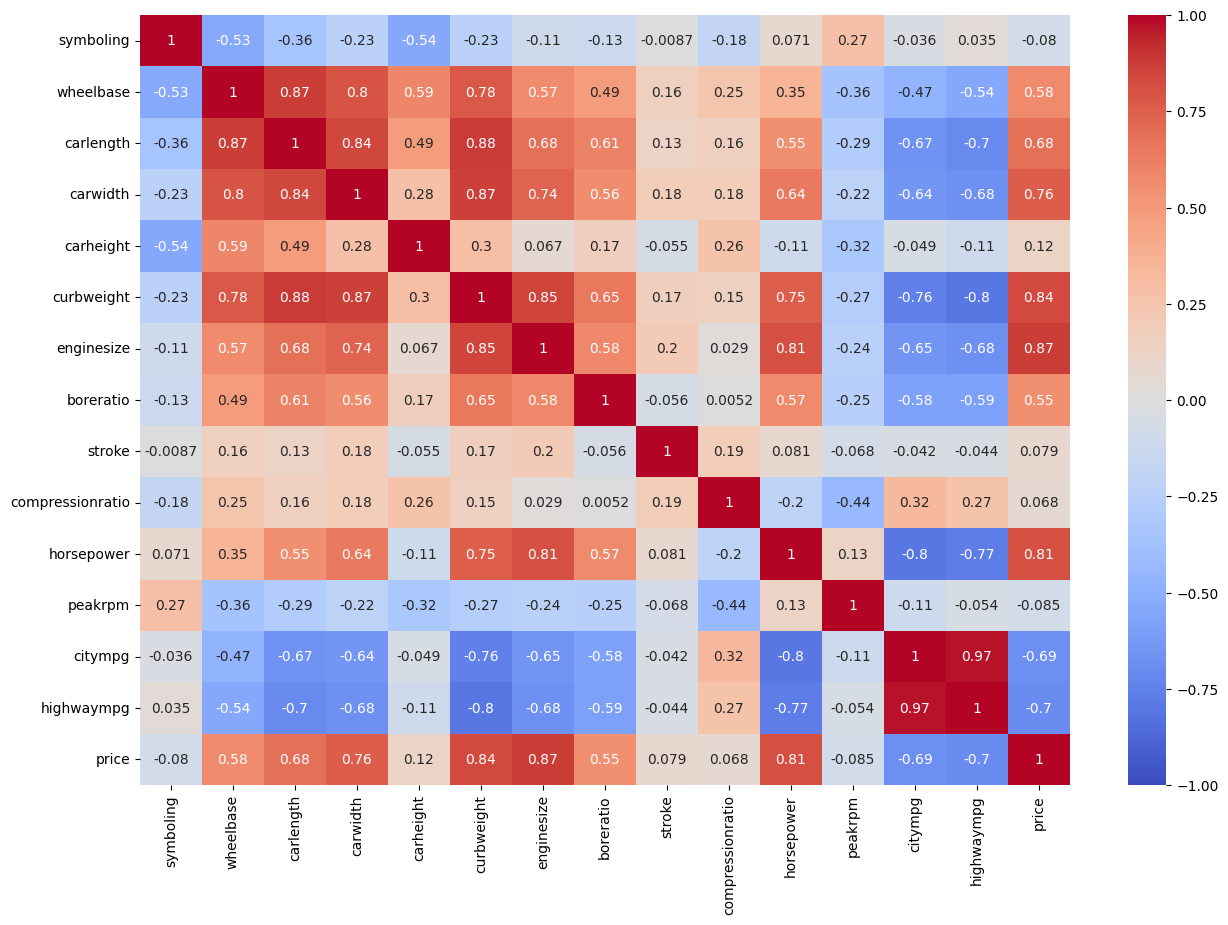

In [49]:
## Correlation Analysis

df_corr = df_numerical.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(data = df_corr, vmin = - 1, vmax = + 1, cmap = 'coolwarm', annot = True)
plt.show()

## Feature Extraction

In [50]:
## Let's do the categorical feature transformation

df_category.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### Let's not address imbalance rightaway. Because there are too many classes and addressing all of them will make data too much inauthentic.

In [51]:
df_copy = df.copy()

* $\textbf{nominal}$ :- fueltype, aspiration, carbody, drivewheel,
enginelocation, enginetype, fuelsystem

* $\textbf{ordinal}$ :- doornumber, cylindernumber

### Variance inflation factor works with numerical ones only. Let's try feature extraction and enginerring first.

In [ ]:
df = df[df['cylindernumber'] != 'three']
df = df[df['cylindernumber'] != 'twelve']

# Label Encoding


df['cylindernumber'] = df['cylindernumber'].replace({'eight':5,'six':4,'five':3,'four':1,'two':2})
df['aspiration'] = df['aspiration'].replace({'std':1,'turbo':0})

df = df.drop(columns = ['fuelsystem','enginetype','fueltype',
                        'carbody','citympg','enginelocation',
                        'carheight','symboling',
                        'doornumber','peakrpm'
                        ,'compressionratio','highwaympg'])
## From here
from sklearn.utils import resample
least_cat = df[df['drivewheel']=='4wd']
smote = resample(least_cat,replace=True, n_samples=30, random_state = 42)
df_oversampled = pd.concat([df,smote], ignore_index=True)
## Till here, it is just encoding.
##It has just been upsampling.


df_oversampled = pd.get_dummies(data = df_oversampled,columns = ['drivewheel'],drop_first=True,dtype='int')

df_oversampled['efficency'] = df_oversampled['horsepower']/df_oversampled['curbweight']
df_oversampled = df_oversampled.drop(columns=['horsepower','curbweight'])

#### Why i dropped the column that i did.

* $\textbf{fuelsystem}$ :- Too many categories and very high imbalance. With only 200 records, its impossible to engineer categories.  
* $\textbf{enginetype}$ :- Very loosely correlated with target var.  
* $\textbf{fueltype}$ :- Its correlation is very low, in -0.012 somthing.  
* $\textbf{carbody}$ :- increase the VIF too much and have v.low correlation with dependent variable.  
* $\textbf{citympg}$ :- The feature has high multicollinearity.  
* $\textbf{enginelocation}$ :- it has 99-1 ratio. And removing it essentially leaves no difference.  
* $\textbf{carheight}$ :- High multicollinearity and other dim. matter more.  
* $\textbf{symbolling}$ :- v. low correlation with dependent column.  
* $\textbf{peakrpm}$ :- v. low correlation with price.  
* $\textbf{doornumber}$ :- Very loosely correlated with target var.  
* $\textbf{compressionration}$ :- v. low correlation with price.  
* $\textbf{highwaympg}$ :- The feature has high multicollinearity.  


#### i am dropping them, because i can't up or bring down any category that will not redice the number of records to essentially zero.

In [53]:
df_oversampled.head()

,aspiration,wheelbase,carlength,carwidth,cylindernumber,enginesize,boreratio,stroke,price,drivewheel_fwd,drivewheel_rwd,efficency
0,1,88.6,168.8,64.1,1,130,3.47,2.68,13495.0,0,1,0.043564
1,1,88.6,168.8,64.1,1,130,3.47,2.68,16500.0,0,1,0.043564
2,1,94.5,171.2,65.5,4,152,2.68,3.47,16500.0,0,1,0.054552
3,1,99.8,176.6,66.2,1,109,3.19,3.40,13950.0,1,0,0.043646
4,1,99.4,176.6,66.4,3,136,3.19,3.40,17450.0,0,0,0.040722


### Let's do OHE here.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_oversampled.drop(columns=['price'])

# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(datacamp_vif_data)

           Feature          VIF
0            const  3121.964751
1       aspiration     1.533682
2        wheelbase     6.512645
3        carlength     6.044026
4         carwidth     5.269845
5   cylindernumber     5.673830
6       enginesize     7.378464
7        boreratio     3.667681
8           stroke     1.808643
9   drivewheel_fwd     3.398513
10  drivewheel_rwd     3.290804
11       efficency     2.585585


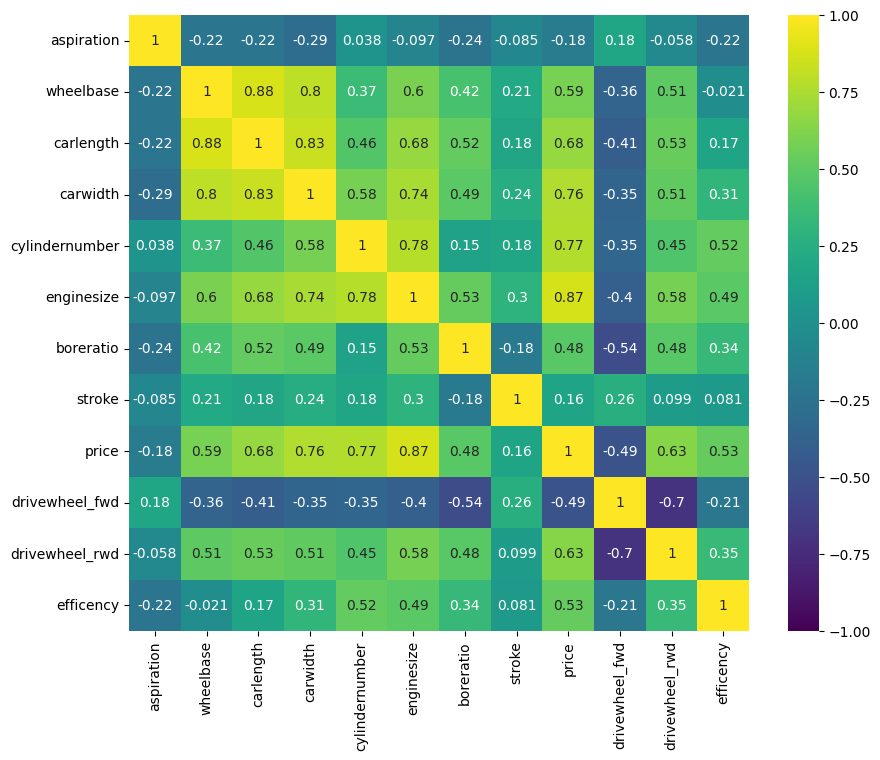

In [13]:
df_corr = df_oversampled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, vmin = -1, vmax = +1,cmap = 'viridis', annot = True)
plt.show()

#### ok, we have the features required and scaled down VIF.



#### I am skipping bivariate plots for now.

In [14]:
skews = {}
for i in df_oversampled.columns:
  vals = df_oversampled[i].skew(axis = 0,skipna = True)
  skews[i] = vals

skews

{'aspiration': np.float64(-1.4632686137412467),
 'wheelbase': np.float64(1.2372874173256405),
 'carlength': np.float64(0.2972063263725654),
 'carwidth': np.float64(1.0963923685527395),
 'cylindernumber': np.float64(1.7922095182626145),
 'enginesize': np.float64(1.9525339425573638),
 'boreratio': np.float64(-0.05264734359935958),
 'stroke': np.float64(-0.49870128252916235),
 'price': np.float64(1.9453032061025135),
 'drivewheel_fwd': np.float64(-0.043206995834712256),
 'drivewheel_rwd': np.float64(0.7674125377136054),
 'efficency': np.float64(1.264655300172839)}

## Preparing data for machine learning, scaling and dealing with outliers etc.

In [15]:
col_list = ['wheelbase', 'carlength', 'carwidth', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke',
        'efficency']

def outlier_capping(df,col):
  upper = df[col].quantile(0.75)
  lower = df[col].quantile(0.25)
  IQR = upper - lower
  df.loc[(df[col]>upper),col] = upper
  df.loc[(df[col]<lower),col] = lower
  return  df

for i in col_list:
  df = outlier_capping(df_oversampled,i)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
numerical_cols = ['wheelbase', 'carlength', 'carwidth',
       'enginesize', 'boreratio', 'stroke',
        'efficency']
cat_cols = ['aspiration','cylindernumber','drivewheel_fwd','drivewheel_rwd']
dataC = df.copy()

In [ ]:
numeric_pipeline = Pipeline(steps=[('stdscaler', StandardScaler())])

preprocessing_pipeline = ColumnTransformer(
    transformers=[('numeric_pipe', numeric_pipeline, numerical_cols)]
)  

In [ ]:
dataC = dataC[numerical_cols]
columns = dataC.columns
dataC = preprocessing_pipeline.fit_transform(dataC)
sacled_data  = pd.DataFrame(dataC, columns = numerical_cols)
sacled_data[['aspiration', 'cylindernumber', 'drivewheel_fwd', 'drivewheel_rwd','price']] = df[['aspiration', 'cylindernumber', 'drivewheel_fwd', 'drivewheel_rwd','price']].values

In [20]:
sacled_data.head()

,wheelbase,carlength,carwidth,enginesize,boreratio,stroke,efficency,aspiration,cylindernumber,drivewheel_fwd,drivewheel_rwd,price
0,-1.186147,-0.920160,-1.207099,0.778652,0.517131,-1.310692,1.150856,1.0,1.0,0.0,1.0,13495.0
1,-1.186147,-0.920160,-1.207099,0.778652,0.517131,-1.310692,1.150856,1.0,1.0,0.0,1.0,16500.0
2,-1.186147,-0.371829,0.149744,1.369809,-1.080767,1.066644,1.304890,1.0,1.0,0.0,1.0,16500.0
3,1.086228,0.861914,0.828165,-0.462777,-0.881030,1.066644,1.170035,1.0,1.0,1.0,0.0,13950.0
4,0.914728,0.861914,1.022000,1.133346,-0.881030,1.066644,0.487288,1.0,1.0,0.0,0.0,17450.0


### let's do ML from here.


In [21]:
x = sacled_data.drop(columns = ['price'])
y = sacled_data['price']


In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression":LinearRegression(),
    "Elastic Net":ElasticNet(),
    "Support Vector Regressor":SVR(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "xgboost":XGBRegressor()
}



In [23]:
sacled_data.shape

(233, 12)

In [24]:
def evaluate_base_model(x,y,models_dict):

  '''
  Here we will make our base models and compare results
  '''

  evaluate_models = {}
  prediction = {}
  r2_values = {}
  train_values = {}
  r2_train_values = {}
  x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
  for key,values in models_dict.items():
    model =  values
    model =  model.fit(x_train,x_test)

    y_pred = model.predict(y_train)
    train_pred = model.predict(x_train)

    metric_value_train = mean_squared_error(x_test,train_pred)
    r2_value_train = r2_score(x_test,train_pred)


    metric_value = mean_squared_error(y_test,y_pred)
    r2_value = r2_score(y_test,y_pred)

    train_values[key] = np.sqrt(metric_value_train)
    r2_train_values[key] = r2_value_train
    evaluate_models[key] = np.sqrt(metric_value)
    prediction[key] = y_pred
    r2_values[key] = r2_value

    dataframe = pd.DataFrame({'Model Name':evaluate_models.keys(),
                              'r2_train_value':r2_train_values.values(),
                              'train_rmse':train_values.values(),
                              'r2_value':r2_values.values(),
                              'test_rmse':evaluate_models.values()})

  return dataframe,prediction

df,prediction = evaluate_base_model(x,y,models)

In [25]:
df

,Model Name,r2_train_value,train_rmse,r2_value,test_rmse
0,Linear Regression,0.590784,4664.700842,0.624716,4932.428240
1,Elastic Net,0.543944,4924.436270,0.559495,5343.868927
2,Support Vector Regressor,-0.125789,7737.059390,-0.150015,8634.403815
3,Random Forest,0.974892,1155.452957,0.886647,2710.792315
4,AdaBoostRegressor,0.907397,2219.010751,0.866001,2947.351606
5,xgboost,0.993918,568.675175,0.873957,2858.508429


## XGBoost Regressor make the best prediction.

In [26]:
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

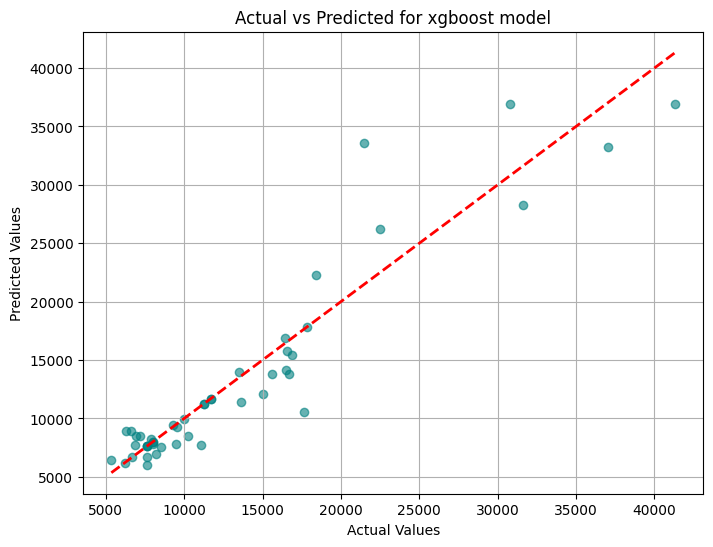

In [27]:
a = [i for i in prediction['xgboost']]

plt.figure(figsize=(8, 6))
plt.scatter(y_test, a, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted for xgboost model')
plt.grid(True)
plt.show()

In [76]:
## Let's try to hyperparametrise it

param_grid = {'learning_rate':[0.01,0.1,1],
             'max_depth':[3,5,7],
              'subsample':[0,0.5,1],
              'n_estimators': [100, 300, 500],
              'gamma': [ 0.1, 0.3, 0.5],
              'reg_alpha': [0, 0.01, 0.1],
              'reg_lambda': [1, 1.5, 2.0]
              }
xgb = XGBRegressor()

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',        # ✅ R² scoring
    cv=2,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train,x_test)
#y_train_pred = grid.predict(x_train)
#y_pred = grid.predict(y_train)


Fitting 2 folds for each of 2187 candidates, totalling 4374 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.3, 0.5],
                         'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'reg_alpha': [0, 0.01, 0.1],
                         'reg_lambda': [1, 1.5, 2.0],
                         'subsample': [0, 0.5, 1]},
             scoring='r2', verbose=2)

In [77]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
grid_search.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'subsample': 0.5}

In [29]:
xgboost = XGBRegressor(gamma = 1,learning_rate = 0.1, max_depth = 3,
                       n_estimator = 100,
                       min_child_weight = 8,
                       subsample = 0.5,reg_alpha = 0.1,reg_lambda = 0.1)
xgboost.fit(x_train,x_test)

y_train_pred = xgboost.predict(x_train)
y_test_pred = xgboost.predict(y_train)


train_metric = r2_score(x_test,y_train_pred)
test_metric = r2_score(y_test,y_test_pred)

print(f'for training : {train_metric}, for test, it is {test_metric}')

for training : 0.8938274660131369, for test, it is 0.8241351799119407


In [31]:
import pickle

#with open('my_model.pkl','wb') as file:
#  pickle.dump(xgboost,file)


In [32]:

with open('my_model.pkl','rb') as model:
  loaded_model = pickle.load(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=100, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)